In [1273]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random

(a) Implement the k-means clustering algorithm from scratch. Ensure that your implementation includes:

(a) Initialization: Use the given centroids as starting points.

In [1274]:
k = 2                           #number of clusters
uStart = [[3,3], [2, 2]]        #initial centroids

#data
X = np.array([
    [5.1, 3.5],
    [4.9, 3.0],
    [5.8, 2.7],
    [6.0, 3.0],
    [6.7, 3.1],
    [4.5, 2.3],
    [6.1, 2.8],
    [5.2, 3.2],
    [5.5, 2.6],
    [5.0, 2.0],
    [8.0, 0.5],
    [7.5, 0.8],
    [8.1, -0.1],
    [2.5, 3.5],
    [1.0, 3.0],
    [4.5, -1.0],
    [3.0, -0.5],
    [5.1, -0.2],
    [6.0, -1.5],
    [3.5, -0.1],
    [4.0, 0.0],
    [6.1, 0.5],
    [5.4, -0.5],
    [5.3, 0.3],
    [5.8, 0.6]
])

(b) Assignment: Assign each data point to the nearest centroid based on the Euclidean distance.

(c) Update: Recalculate the centroids after each assignment by computing the mean of all points assigned to each centroid.

In [1275]:
def KmeansClusteringAlgo(X, u, k):
    
    #assignment
    clusters = []
    for i in range(k):
        clusters.append([])
    for x in X:
        d2= (u[0][0]-x[0])**2 + (u[0][1]-x[1])**2
        ind = 0
        for i in range(k):
            d = (u[i][0]-x[0])**2 + (u[i][1]-x[1])**2
            if d < d2:
                d2 = d
                ind = i
        clusters[ind].append(x)
    for i in range(k):
        if(len(clusters[i]) != 0):
            clusters[i] = np.array(clusters[i])

    #Update
    for i in range(k):
        if(len(clusters[i]) != 0):
            u[i] = np.mean(clusters[i], axis=0)
    return clusters, u

(d) Convergence Check: Terminate the algorithm if centroids do not significantly change between iterations or after a maximum of 100 iterations. Use a convergence threshold of 1e-4.

In [1276]:
#convergence check
def convergenceCheck(k, u, prev_u, threshold):
    # print("Centroids: ", u)
    # print("Previous Centroids: ", prev_u)
    for i in range(k):
        if((u[i][0]-prev_u[i][0])**2 + (u[i][1]-prev_u[i][1])**2 > threshold**2):
            return False
    return True

u = uStart.copy()
prev_u = uStart.copy()
threshold = 1e-4

#main loop
for i in range(100):
    clusters, u = KmeansClusteringAlgo(X, u, k)
    if(i==0):
        initial_clusters = clusters.copy()
    if(convergenceCheck(k, u, prev_u, threshold)):
        break
    prev_u = u.copy()


(b) Find the values of final centroids after the algorithm converges. Plot the two clusters at the start of the process and at the end.

initial centroids: [[3, 3], [2, 2]]


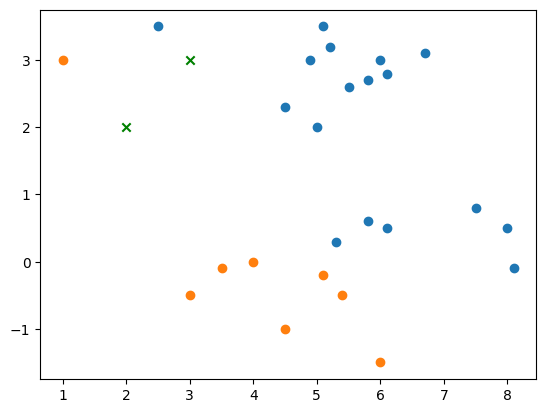

final centroids: [array([5.8  , 2.125]), array([ 4.2       , -0.05555556])]


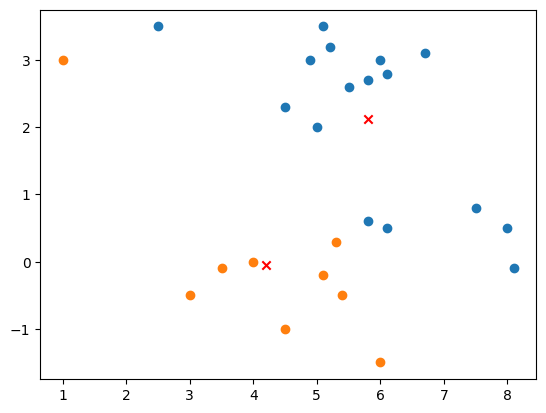

In [1277]:
print(f"initial centroids: {uStart}")
figure = plt.figure()
for i in range(k):
    if(len(initial_clusters[i])>0):
        plt.scatter(initial_clusters[i][:,0], initial_clusters[i][:,1])
plt.scatter(np.array(uStart)[:,0], np.array(uStart)[:,1], c='green', marker='x')
plt.show()

print(f"final centroids: {u}")

figure = plt.figure()
for i in range(k):
    if(len(clusters[i])>0):
        plt.scatter(clusters[i][:,0], clusters[i][:,1])
plt.scatter(np.array(u)[:,0], np.array(u)[:,1], c='red', marker='x')
plt.show()

(c) Compare the results using the provided initial centroids versus using random initialization of centroids.

initial random centroids: [[1.486507587026301, 0.8066430180546913], [2.4590606874938263, -0.6532629506153536]]


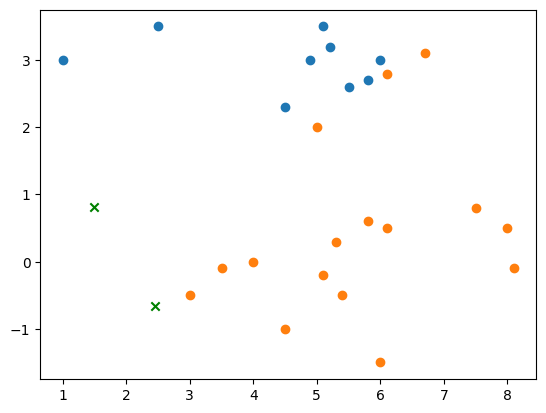

final centroids: [array([4.85833333, 2.89166667]), array([ 5.56153846, -0.09230769])]


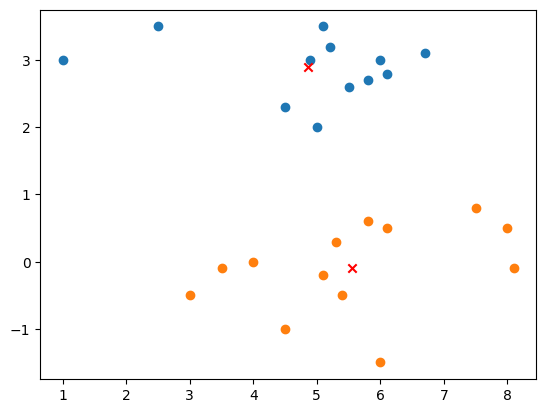

In [1278]:
#random initialization of centroids
uStartRandom = []
for i in range(k):
    uStartRandom.append([random.uniform(1, 8), random.uniform(-2, 4)])

u = uStartRandom.copy()
prev_u = uStartRandom.copy()
threshold = 1e-4

#main loop
for i in range(100):
    clusters, u = KmeansClusteringAlgo(X, u, k)
    if(i==0):
        initial_clusters = clusters.copy()
    if(convergenceCheck(k, u, prev_u, threshold)):
        break
    prev_u = u.copy()

print(f"initial random centroids: {uStartRandom}")
figure = plt.figure()
for i in range(k):
    if(len(initial_clusters[i])>0):
        plt.scatter(initial_clusters[i][:,0], initial_clusters[i][:,1])
plt.scatter(np.array(uStartRandom)[:,0], np.array(uStartRandom)[:,1], c='green', marker='x')
plt.show()

print(f"final centroids: {u}")
figure = plt.figure()
for i in range(k):
    if(len(clusters[i])>0):
        plt.scatter(clusters[i][:,0], clusters[i][:,1])
plt.scatter(np.array(u)[:,0], np.array(u)[:,1], c='red', marker='x')
plt.show()

(d) Determine the optimal number of clusters, M, using the Elbow method. Plot the Within-Cluster Sum of Squares (WCSS) against different values of k to find the elbow point. Randomly initialize M centroids, perform clustering and plot the resulting clusters

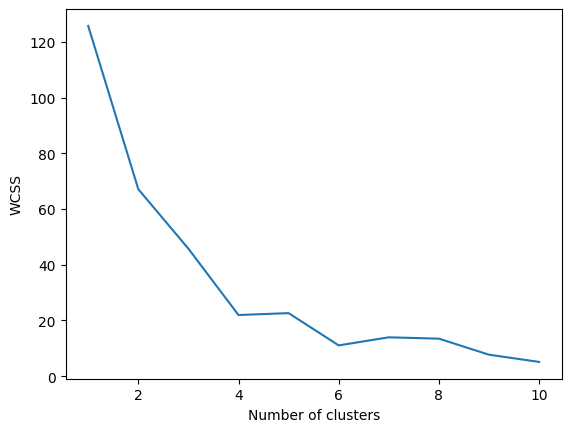

In [1279]:
#elbow method
WCSS = []
iter = 10

for i in range(1, 1+iter):
    k = i
    
    #random initialization of centroids
    uStartRandom = []
    for i in range(k):
        uStartRandom.append([random.uniform(1, 8), random.uniform(-2, 4)])

    u = uStartRandom.copy()
    prev_u = uStartRandom.copy()
    threshold = 1e-4

    # print(u)
    #main loop
    for i in range(100):
        clusters, u = KmeansClusteringAlgo(X, u, k)
        if(i==0):
            initial_clusters = clusters.copy()
        if(convergenceCheck(k, u, prev_u, threshold)):
            break
        prev_u = u.copy()

    temp = 0
    for i in range(k):
        for j in range(len(clusters[i])):
            temp += (clusters[i][j][0]-u[i][0])**2 + (clusters[i][j][1]-u[i][1])**2
    WCSS.append(temp)

#plot the WCSS vs number of clusters
figure = plt.figure()
plt.plot(range(1,iter+1), WCSS)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 
    

initial random centroids: [[7.751535380253886, 1.1099140950796187], [6.1942820339034625, 3.9969457167780993], [2.657251591908996, 1.0819853014590644], [5.025570835838559, 1.3269239210518915]]


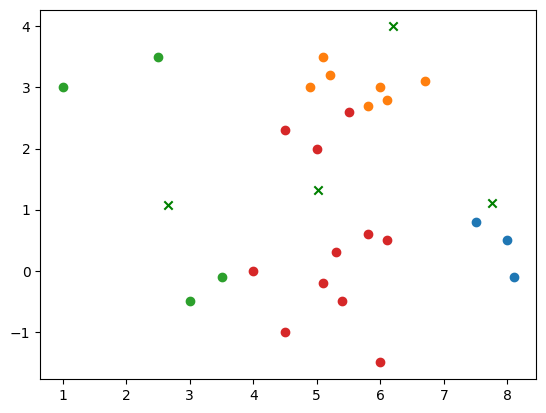

final centroids: [array([7.86666667, 0.4       ]), array([5.48, 2.82]), array([1.75, 3.25]), array([ 4.87, -0.24])]


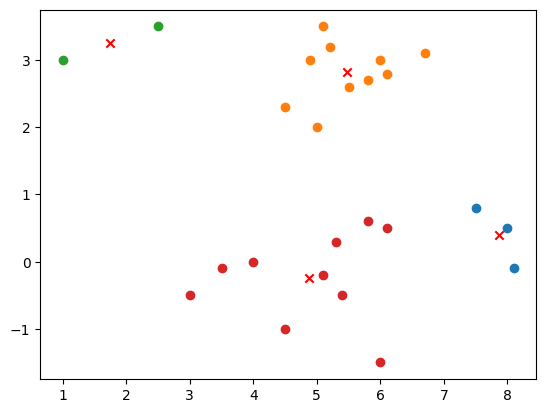

In [1280]:
#observation: the number of optimal number of clusters is 4
M = 4
k = M

#random initialization of centroids
uStartRandom = []
for i in range(k):
    uStartRandom.append([random.uniform(1, 8), random.uniform(-2, 4)])

u = uStartRandom.copy()
prev_u = uStartRandom.copy()
threshold = 1e-4

#main loop
for i in range(100):
    clusters, u = KmeansClusteringAlgo(X, u, k)
    if(i==0):
        initial_clusters = clusters.copy()
    if(convergenceCheck(k, u, prev_u, threshold)):
        break
    prev_u = u.copy()

print(f"initial random centroids: {uStartRandom}")
figure = plt.figure()
for i in range(k):
    if(len(initial_clusters[i])>0):
        plt.scatter(initial_clusters[i][:,0], initial_clusters[i][:,1])
plt.scatter(np.array(uStartRandom)[:,0], np.array(uStartRandom)[:,1], c='green', marker='x')
plt.show()

print(f"final centroids: {u}")
figure = plt.figure()
for i in range(k):
    if(len(clusters[i])>0):
        plt.scatter(clusters[i][:,0], clusters[i][:,1])
plt.scatter(np.array(u)[:,0], np.array(u)[:,1], c='red', marker='x')
plt.show()